In [4]:
import pandas as pd
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91091\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91091\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Data loading for Machine Translation Task

In [5]:
def load_mt_data(directory="nusax/datasets/mt/"):
    """
    Load machine translation data from NusaX dataset.
    Returns training, validation, and testing data for each language separately.
    
    Returns:
        dict: A dictionary with language keys ('indonesian', 'english', 'javanese').
              Each key contains another dictionary with keys 'train', 'valid', and 'test'.
              Each of these keys maps to a tuple of (tokenized_data, original_data), where:
                  - tokenized_data: List of tokenized sentences in the corresponding language.
                  - original_data: List of original sentences(in other words, not tokenized) in the corresponding language.
    
    Example usage:
        mt_data = load_mt_data()
        indonesian_train_data = mt_data['indonesian']['train']
        english_valid_data = mt_data['english']['valid']
        javanese_test_data = mt_data['javanese']['test']
    """
    train_data = pd.read_csv(directory + "train.csv")
    valid_data = pd.read_csv(directory + "valid.csv")
    test_data = pd.read_csv(directory + "test.csv")

    languages = ["indonesian", "english", "javanese"]
    data = {}

    for lang in languages:
        xtrain = [" ".join(word_tokenize(sent)) for sent in list(train_data[lang])]
        xvalid = [" ".join(word_tokenize(sent)) for sent in list(valid_data[lang])]
        xtest = [" ".join(word_tokenize(sent)) for sent in list(test_data[lang])]
        ytrain = list(train_data[lang])
        yvalid = list(valid_data[lang])
        ytest = list(test_data[lang])

        data[lang] = {
            "train": (xtrain, ytrain),
            "valid": (xvalid, yvalid),
            "test": (xtest, ytest)
        }

    return data

# Data loading for Sentiment Analysis Task

In [6]:
def load_sentiment_data(directory="nusax/datasets/sentiment/"):
    """
    Load sentiment analysis data from NusaX dataset.
    Returns training, validation, and testing data along with labels for each language.
    
    Returns:
    dict: A dictionary with language keys ('indonesian', 'english', 'javanese').
            Each key contains another dictionary with keys 'train', 'valid', and 'test'.
            Each of these keys maps to a tuple of (tokenized_data, original_data), where:
                - tokenized_data: List of tokenized sentences in the corresponding language.
                - original_data: List of original sentences(in other words, not tokenized) in the corresponding language.
    
    Example usage:
        sentiment_data = load_sentiment_data()
        english_train_data = sentiment_data['english']['train']
        indonesian_valid_data = sentiment_data['indonesian']['valid']
        javanese_test_data = sentiment_data['javanese']['test']
    """
    languages = ["indonesian", "english", "javanese"]
    data = {}

    for lang in languages:
        lang_directory = directory + lang + "/"
        train_df = pd.read_csv(lang_directory + "train.csv")
        valid_df = pd.read_csv(lang_directory + "valid.csv")
        test_df = pd.read_csv(lang_directory + "test.csv")

        xtrain = [" ".join(word_tokenize(sent)) for sent in list(train_df['text'])]
        ytrain = list(train_df['label'])
        xvalid = [" ".join(word_tokenize(sent)) for sent in list(valid_df['text'])]
        yvalid = list(valid_df['label'])
        xtest = [" ".join(word_tokenize(sent)) for sent in list(test_df['text'])]
        ytest = list(test_df['label'])

        data[lang] = {
            "train": (xtrain, ytrain),
            "valid": (xvalid, yvalid),
            "test": (xtest, ytest)
        }
    
    return data

In [7]:
# test and print
mt_data = load_mt_data()
sentiment_data = load_sentiment_data()

print("Machine Translation Data:")
print(mt_data)
print("\nSentiment Analysis Data:")
print(sentiment_data)

Machine Translation Data:
{'indonesian': {'train': (['Nikmati cicilan 0 % hingga 12 bulan untuk pemesanan tiket pesawat air asia dengan kartu kredit bni !', 'Kue-kue yang disajikan bikin saya bernostalgia . Semuanya tipikal kue zaman dulu , baik dari penampilan maupun rasa . Kuenya enak dan harganya juga murah .', 'Ibu pernah bekerja di grab indonesia', 'Paling suka banget makan siang di sini ayam sama sambalnya enak banget harganya luar biasa hemat , rasa ayamnya meresap sampai ketulangnya , es lidah buayanya juga segar bikin adem perut setelah makan sambal yang pedas , pelayannya sigap dan ramah , yang aku suka di tempat kasir ada tulisan 10 % disumbangkan untuk beramal , buat makan jadi lebih enak ke perut', 'Pelayanan bus DAMRI sangat baik', 'Mau bikin postingan yang isinya mengedukasi customers gojek .', 'Ratusan rumah di medan terendam banjir', 'Barangnya lumayan , cuma yang saya heran xiaomi redmi note 2 ini tombol onnya memang agak rusak ? Terus baterai memang cepat low bat jur

VADER是用于情感分析的模型，结合情感词典与规则。

原理：VADER 主要依赖于一个预构建的情感词典来进行情感分析。这个词典包含了大量的词汇以及它们预先标注好的情感倾向（积极、消极或中性）和情感强度值。

计算：VADER 会对输入的文本进行分词处理，然后将每个单词与情感词典中的词汇进行匹配，算出-1到1间情感得分，反映情感倾向及强度。这个得分通常是一个在 - 1 到 1 之间的数值，其中：接近 1 的分数表示强烈的积极情感，接近 -1 的分数表示强烈的消极情感，

优势：简单易用、适合社交媒体文本、可解释性强。

局限：依赖词典规则，对新词汇等情况可能不准，缺乏上下文深度理解。

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

vader训练代码：

In [9]:
def analyze_sentiment_with_vader(data_dict):
    """
    Analyze sentiment of the loaded data using the VADER model.

    Args:
        data_dict (dict): The dictionary of data loaded by load_sentiment_data function.

    Returns:
        dict: A dictionary with language keys ('indonesian', 'english', 'javanese').
              Each key contains another dictionary with keys 'train', 'valid', 'test'.
              Each of these keys maps to a tuple of (sentiment_scores, original_data), where:
                  - sentiment_scores: List of sentiment scores for each sentence in the corresponding set.
                  - original_data: List of original sentences (not tokenized) in the corresponding set.
    """
    analyzer = SentimentIntensityAnalyzer()
    analyzed_data = {}

    for lang, lang_data in data_dict.items():
        analyzed_lang_data = {}

        for set_type in ['train', 'valid', 'test']:
            tokenized_data, original_data = lang_data[set_type]
            sentiment_scores = []

            for sent in tokenized_data:
                scores = analyzer.polarity_scores(sent)
                sentiment_scores.append(scores)

            analyzed_lang_data[set_type] = (sentiment_scores, original_data)

        analyzed_data[lang] = analyzed_lang_data

    return analyzed_data

混淆矩阵可视化：<br>
由于VADER（Valence Aware Dictionary and sEntiment Reasoner）主要是针对英语进行预训练的情感分析工具。<br>
并且，从产出的图来看，vader只对英语的预训练有效，在印尼语和爪哇语基本没效果。


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def visualize_sentiment_analysis_results(analyzed_sentiment_data):
    """
    Visualize the sentiment analysis results using confusion matrices.

    Args:
        analyzed_sentiment_data (dict): The dictionary of analyzed sentiment data.
            It should have language keys ('indonesian', 'english', 'javanese') and
            each language key contains another dictionary with keys 'train', 'valid', 'test'.
            Each of these keys maps to a tuple of (sentiment_scores, original_data), where:
                - sentiment_scores: List of sentiment scores for each sentence in the corresponding set.
                - original_data: List of original sentences (not tokenized) in the corresponding set.
    """
    languages = analyzed_sentiment_data.keys()
    dataset_types = ['train', 'valid', 'test']

    for lang in languages:
        for set_type in dataset_types:
            sentiment_scores, original_data = analyzed_sentiment_data[lang][set_type]

            true_labels = []
            predicted_labels = []

            for i, score in enumerate(sentiment_scores):
                if score['compound'] >= 0.2:
                    predicted_label = 'positive'
                elif score['compound'] <= -0.1:
                    predicted_label = 'negative'
                else:
                    predicted_label = 'neutral'

                true_label = original_data[i]

                true_labels.append(true_label)
                predicted_labels.append(predicted_label)

            cm = confusion_matrix(true_labels, predicted_labels)

            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title(f'Confusion Matrix for {lang} - {set_type}')
            plt.show()

评价函数：<br>
计算 accuracy, precision, recall, f1，帮助评价模型拟合好坏

In [ ]:

def evaluate_sentiment_analysis_results(analyzed_sentiment_data):
    """
    Evaluate the sentiment analysis results by calculating accuracy, precision, recall, and F1 score.

    Args:
        analyzed_sentiment_data (dict): The dictionary of analyzed sentiment data.
            It should have language keys ('indonesian', 'english', 'javanese') and
            each language key contains another dictionary with keys 'train', 'valid', 'test'.
            Each of these keys maps to a tuple of (sentiment_scores, original_data), where:
                - sentiment_scores: List of sentiment scores for each sentence in the corresponding set.
                - original_data: List of original sentences (not tokenized) in the corresponding set.

    Returns:
        dict: A dictionary with language keys ('indonesian', 'english', 'javanese').
            Each key contains another dictionary with keys 'train', 'valid', 'test'.
            Each of these keys maps to a tuple of (accuracy, precision, recall, F1), where:
                - accuracy: The accuracy of the sentiment analysis for the corresponding set.
                - precision: The precision of the sentiment analysis for the corresponding set.
                - recall: The recall of the sentiment analysis for the corresponding set.
                - F1: The F1 score of the sentiment analysis for the corresponding set.
    """
    evaluation_results = {}

    for lang, lang_data in analyzed_sentiment_data.items():
        lang_eval_results = {}

        for set_type, (sentiment_scores, original_data) in lang_data.items():
            true_positives = 0
            true_negatives = 0
            false_positives = 0
            false_negatives = 0

            for i, score in enumerate(sentiment_scores):
                if score['compound'] >= 0.2:
                    predicted_label = 'positive'
                elif score['compound'] <= -0.1:
                    predicted_label = 'negative'
                else:
                    predicted_label = 'neutral'

                actual_label = original_data[i]

                if predicted_label == actual_label:
                    if predicted_label == 'positive':
                        true_positives += 1
                    elif predicted_label == 'negative':
                        true_negatives += 1
                    else:
                        true_negatives += 1
                else:
                    if predicted_label == 'positive':
                        false_positives += 1
                    elif predicted_label == 'negative':
                        false_negatives += 1
                    else:
                        false_positives += 1

            accuracy = (true_positives + true_negatives) / len(original_data)
            precision = true_positives / (true_positives + false_positives)
            recall = true_positives / (true_positives + false_negatives)
            F1 = 2 * (precision * recall) / (precision + recall)

            lang_eval_results[set_type] = (accuracy, precision, recall, F1)

        evaluation_results[lang] = lang_eval_results

    return evaluation_results

主函数，实现上面的三个函数

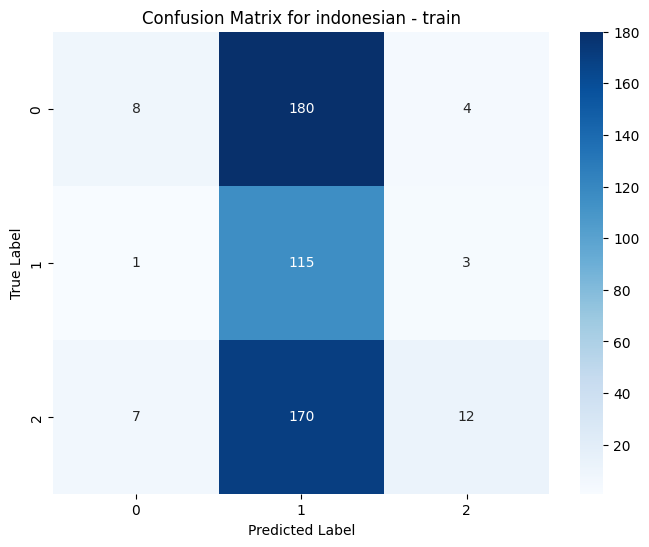

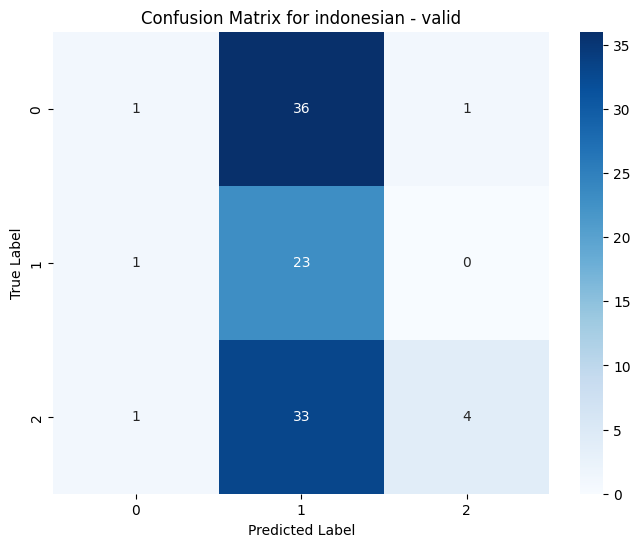

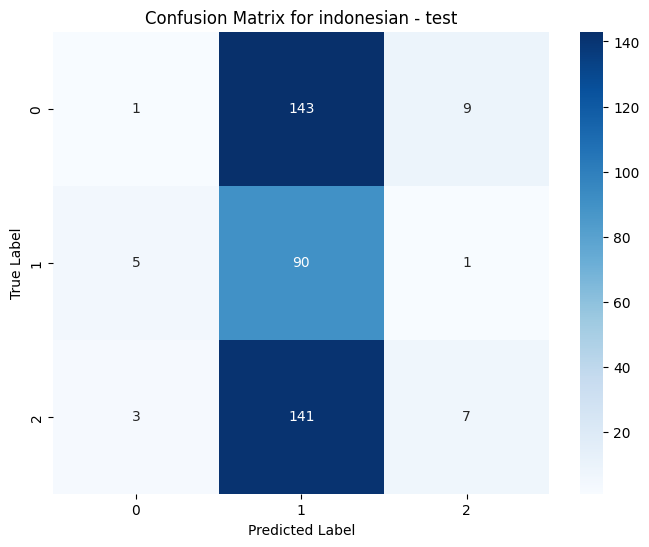

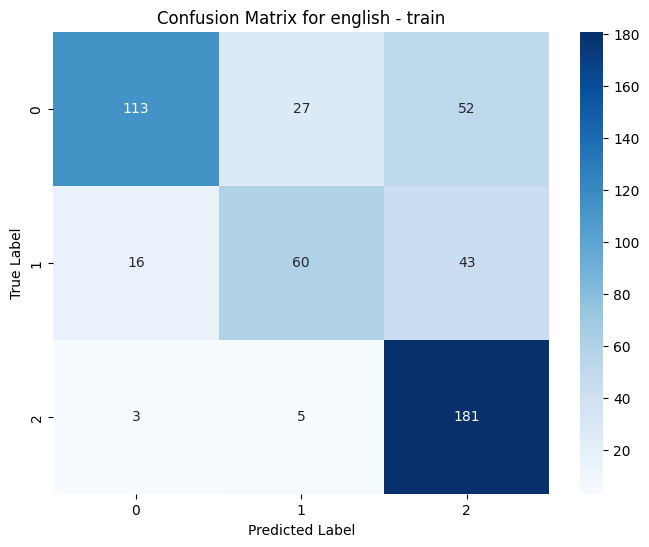

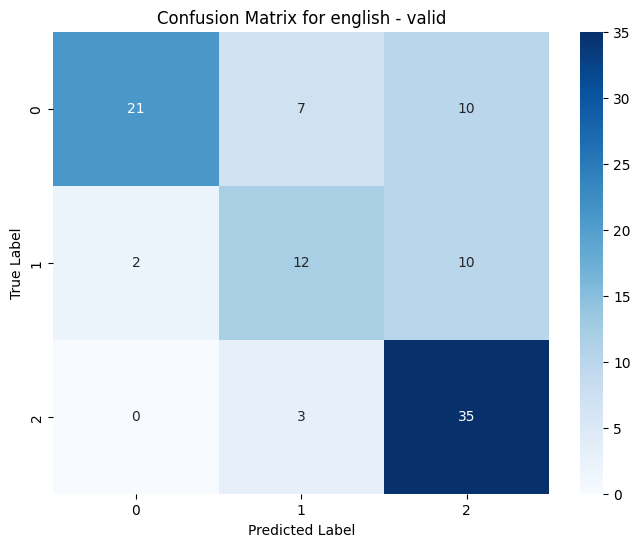

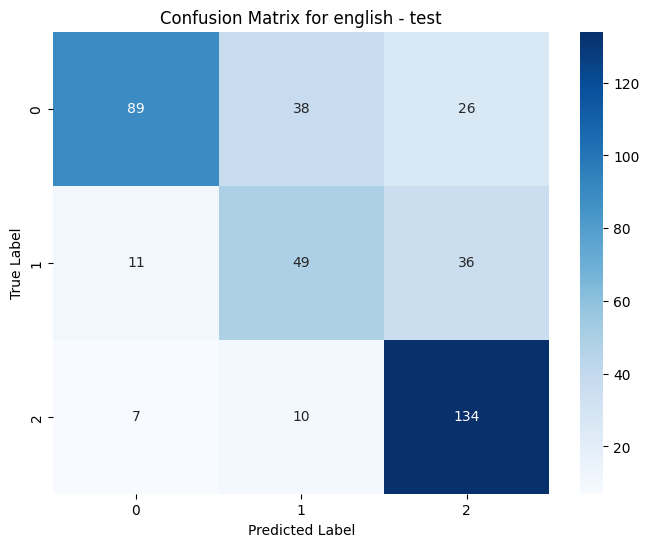

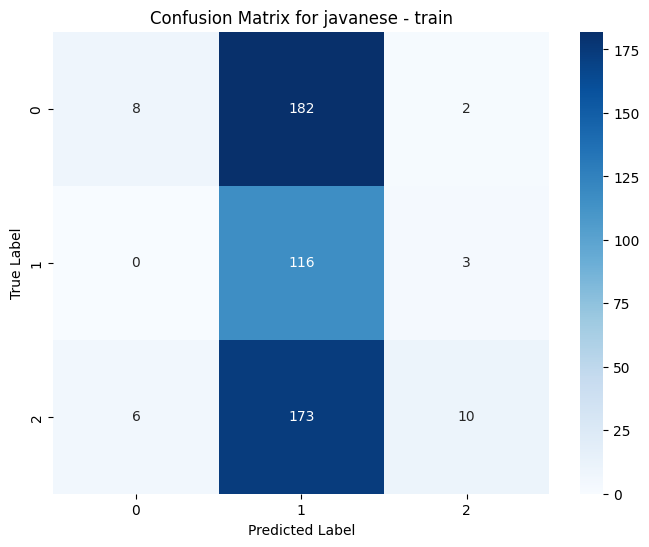

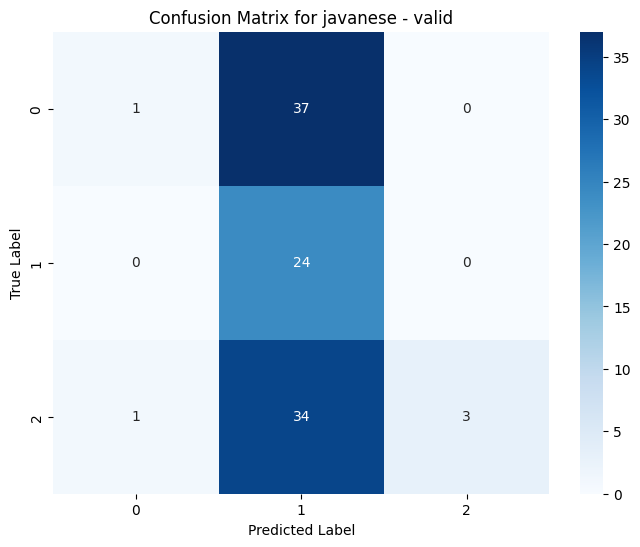

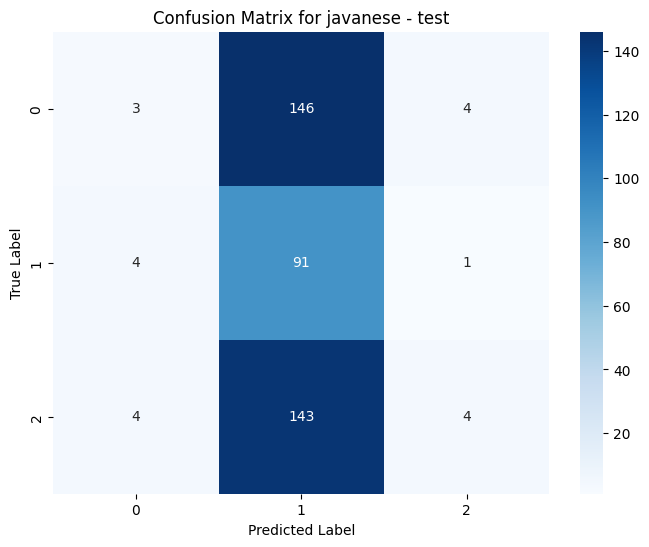

Language: indonesian
  Set type: train
    Accuracy: 0.27
    Precision: 0.032520325203252036
    Recall: 0.6
    F1 Score: 0.06169665809768638
--------------------------------------------------
  Set type: valid
    Accuracy: 0.28
    Precision: 0.05405405405405406
    Recall: 0.6666666666666666
    F1 Score: 0.1
--------------------------------------------------
  Set type: test
    Accuracy: 0.245
    Precision: 0.023255813953488372
    Recall: 0.4666666666666667
    F1 Score: 0.04430379746835443
--------------------------------------------------
Language: english
  Set type: train
    Accuracy: 0.708
    Precision: 0.5876623376623377
    Recall: 0.905
    F1 Score: 0.7125984251968503
--------------------------------------------------
  Set type: valid
    Accuracy: 0.68
    Precision: 0.5384615384615384
    Recall: 0.9459459459459459
    F1 Score: 0.6862745098039216
--------------------------------------------------
  Set type: test
    Accuracy: 0.68
    Precision: 0.5491803278688

In [ ]:

if __name__ == "__main__":
    analyzed_sentiment_data = analyze_sentiment_with_vader(sentiment_data)

    visualize_sentiment_analysis_results(analyzed_sentiment_data)
    evaluation_results = evaluate_sentiment_analysis_results(analyzed_sentiment_data)

    for lang, lang_results in evaluation_results.items():
        print(f"Language: {lang}")
        for set_type, (accuracy, precision, recall, f1) in lang_results.items():
            print(f"  Set type: {set_type}")
            print(f"    Accuracy: {accuracy}")
            print(f"    Precision: {precision}")
            print(f"    Recall: {recall}")
            print(f"    F1 Score: {f1}")
            print("-" * 50)

Word2Vec 的主要目标是将自然语言中的单词映射到一个低维的向量空间中，使得语义相近的单词在这个向量空间中的向量表示也相近。通过这种方式，将单词转化为向量形式，以便后续在各种自然语言处理任务（如文本分类、信息检索、机器翻译等）中可以利用这些向量进行计算和分析。<br>
word2vec不直接参与分类任务，所以不进行混淆矩阵检验

In [22]:
from gensim.models import Word2Vec
import numpy as np


def train_word2vec_on_mt_data(mt_data_dict):
    """
    Train Word2Vec model on the machine translation data loaded by load_mt_data function.

    Args:
        mt_data_dict (dict): The dictionary of machine translation data loaded by load_mt_data function.

    Returns:
        Word2Vec: The trained Word2Vec model.
    """
    all_sentences = []

    for lang, lang_data in mt_data_dict.items():
        for set_type in ['train', 'valid', 'test']:
            tokenized_data, _ = lang_data[set_type]
            sentences = [word_tokenize(sent) for sent in tokenized_data]
            all_sentences.extend(sentences)

    model = Word2Vec(sentences=all_sentences, vector_size=100, window=5, min_count=1, workers=4)
    model.train(all_sentences, total_examples=len(all_sentences), epochs=10)

    return model


def get_word_vectors(model, words):
    """
    Get word vectors for a list of words from the trained Word2Vec model.

    Args:
        model (Word2Vec): The trained Word2Vec model.
        words (list): A list of words for which to get the word vectors.

    Returns:
        list: A list of numpy arrays representing the word vectors of the given words.
    """
    return [model.wv[word] for word in words]


if __name__ == "__main__":
    trained_word2vec_model = train_word2vec_on_mt_data(mt_data)

    # 示例：获取一些单词的词向量
    sample_words = ["Semuanya","tipikal","dulu","dari", "penampilan"]
    word_vectors = get_word_vectors(trained_word2vec_model, sample_words)

    for word, vector in zip(sample_words, word_vectors):
        print(f"Word: {word}")
        print(f"Word Vector: {vector}")
        print("-" * 50)

Word: Semuanya
Word Vector: [-3.05742826e-02  4.77473140e-02 -8.34168307e-03  5.08179888e-02
 -1.65083688e-02 -1.29989877e-01 -4.57370505e-02  4.21400443e-02
  1.51242211e-01 -1.05296098e-01  2.69949157e-02 -1.14993565e-01
 -4.59999591e-02 -2.50547584e-02  6.15174808e-02  7.07743317e-03
  1.18721150e-01 -1.96089312e-01  1.66748744e-02 -7.87616372e-02
 -2.95358500e-03  3.14428541e-03  5.02035245e-02  1.29577527e-02
 -2.07592905e-01 -4.41109091e-02 -6.37976751e-02  5.09810150e-02
  8.06442741e-03 -2.77921762e-02  5.56531474e-02 -5.07233925e-02
  3.79549433e-03  7.57959411e-02 -1.74651742e-02 -5.03493659e-03
  1.76566243e-02  1.60025246e-02 -1.00439474e-01 -4.86836024e-02
 -2.61106007e-02  4.72547263e-02 -3.75686511e-02 -2.75331233e-02
 -4.26759804e-03  4.66371775e-02  3.76991741e-02  3.98124419e-02
  8.03893339e-03  4.37527820e-02 -1.13350507e-02  1.74646173e-02
  6.80972412e-02  1.37837216e-01 -1.51103884e-02  3.13313454e-02
  1.17080167e-01  1.68390535e-02  4.23901603e-02 -2.84204483e-